In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


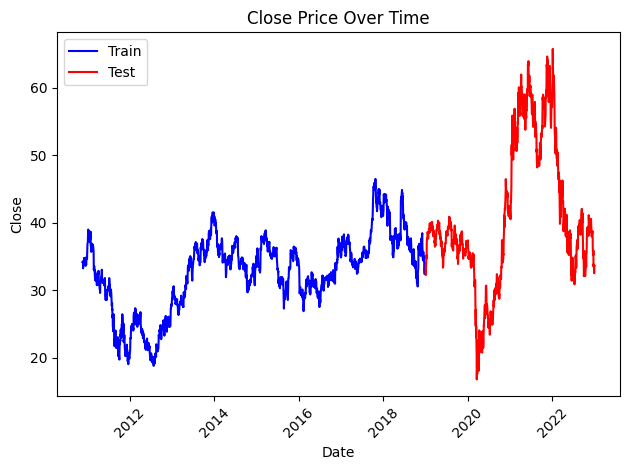

In [2]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GM',start_date,end_date,period,2019)
data.data_preprocess()

Running ring
Generation 1: Best fitness = 4.004167278472861  Average Fitness = 1.1597614045515443
Generation 2: Best fitness = 4.117090405217397  Average Fitness = 1.7225210625465739
Generation 3: Best fitness = 6.029883307584801  Average Fitness = 2.2023647564148447
Generation 4: Best fitness = 6.029883307584801  Average Fitness = 2.8202255080825513
Generation 5: Best fitness = 6.029883307584801  Average Fitness = 2.801973134032606
Island 0 Migration -Left island 7 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Island 2 Migration -Left island 1 -Right island 3
Island 3 Migration -Left island 2 -Right island 4
Island 4 Migration -Left island 3 -Right island 5
Island 5 Migration -Left island 4 -Right island 6
Island 6 Migration -Left island 5 -Right island 7
Island 7 Migration -Left island 6 -Right island 0
Generation 6: Best fitness = 6.029883307584801  Average Fitness = 4.353273779147531
Generation 7: Best fitness = 6.029883307584801  Average Fitness = 4.41997531455

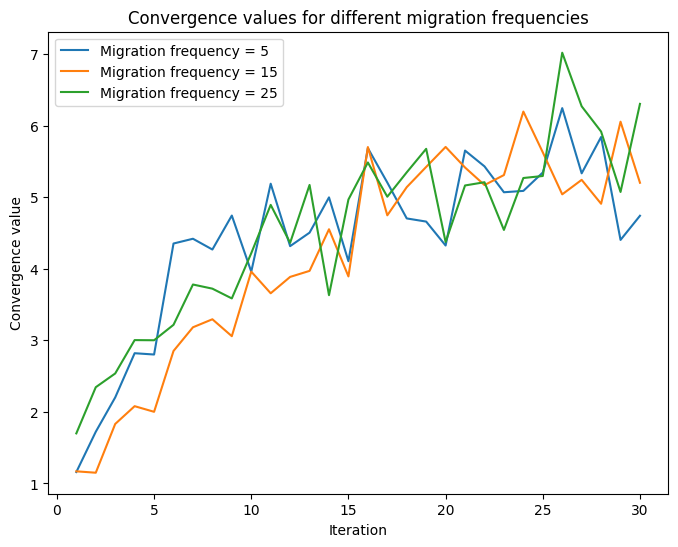

In [5]:
# ring
values = []
migration_freq = [5 , 15,25]
num_runs = 1
convergence_values = []
for i in migration_freq:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,num_islands=8,m_iter= i,num_iter=30,n_migrants_rate=0.5,pSize=20,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy="ring")
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

# plot the convergence values for each crossover rate
plt.figure(figsize=(8, 6))
for i in range(len(migration_freq)):
    plt.plot(np.arange(1, 31), convergence_values[i], label='Migration frequency = ' + str(migration_freq[i]))
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for different migration frequencies')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and (30,)

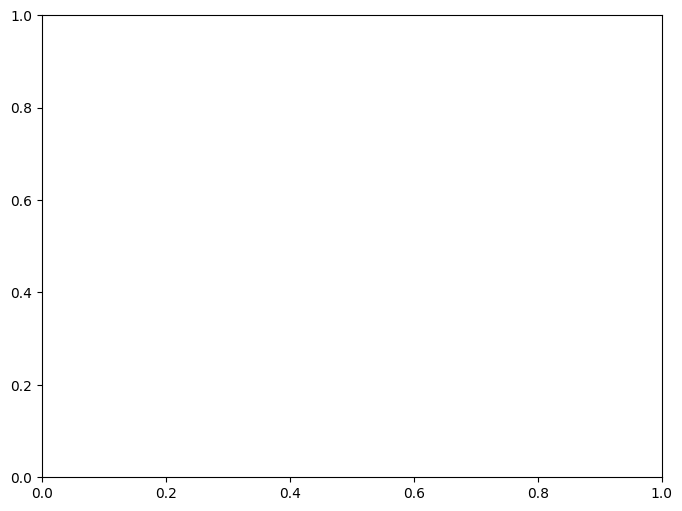

In [7]:
# plot the convergence values for each crossover rate
migration_rates = [0, 0.5 , 0.8]
plt.figure(figsize=(8, 6))
for i in range(len(migration_rates)):
    plt.plot(np.arange(1, 51), convergence_values[i], label='Migration rate = ' + str(migration_rates[i]))
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for different migration rates')
plt.legend()
plt.grid(True) 
plt.show()

Running multikuti
Generation 1: Best fitness = 6.443521131910704  Average Fitness = 1.9848929275481384
Generation 2: Best fitness = 6.443521131910704  Average Fitness = 2.769408847034016
Generation 3: Best fitness = 7.18152478601643  Average Fitness = 3.3493107880593915
Generation 4: Best fitness = 7.18152478601643  Average Fitness = 3.7513893669357294
Generation 5: Best fitness = 7.18152478601643  Average Fitness = 4.162762796363632
Generation 6: Best fitness = 7.770589380108365  Average Fitness = 4.301319505098579
Generation 7: Best fitness = 7.770589380108365  Average Fitness = 4.472032739975514
Generation 8: Best fitness = 7.770589380108365  Average Fitness = 4.7112780314375815
Generation 9: Best fitness = 7.770589380108365  Average Fitness = 4.8584852796944356
Generation 10: Best fitness = 7.770589380108365  Average Fitness = 5.082119019438643
Generation 11: Best fitness = 7.818363325883259  Average Fitness = 5.104443782068107
Generation 12: Best fitness = 8.310967050576963  Avera

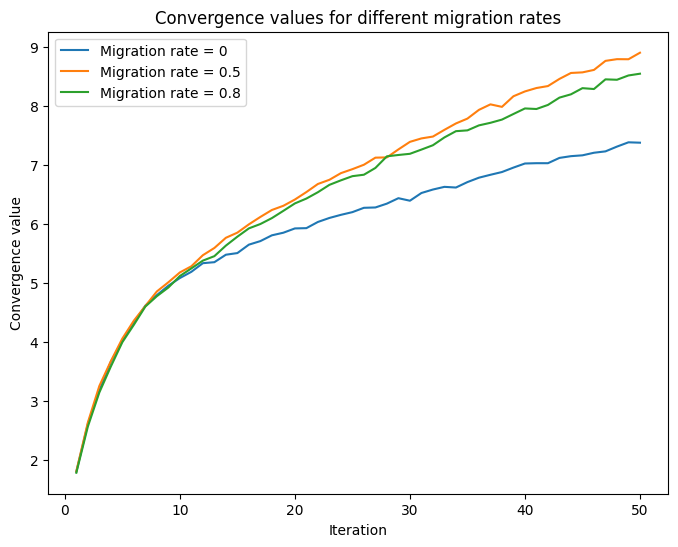

In [8]:
# multikuti
# ring
values = []
migration_rates = [0, 0.5 , 0.8]
num_runs = 20
convergence_values = []
for i in migration_rates:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,num_islands=8,m_iter= 5,num_iter=50,n_migrants_rate=i,pSize=200,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy="multikuti")
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

# plot the convergence values for each crossover rate
plt.figure(figsize=(8, 6))
for i in range(len(migration_rates)):
    plt.plot(np.arange(1, 51), convergence_values[i], label='Migration rate = ' + str(migration_rates[i]))
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for different migration rates')
plt.legend()
plt.show()

In [9]:
from scipy import stats

# Compare the convergence metrics of the two algorithms
t_statistic, p_value = stats.ttest_ind(convergence_values[0], convergence_values[2])

# Print the results
if p_value < 0.05:
    print("The difference in convergence is statistically significant.")
else:
    print("The difference in convergence is not statistically significant.")
print(p_value)


The difference in convergence is not statistically significant.
0.06040014422699678


In [10]:
file_name = "migration_rate_multikuti"
np.save(file_name,file_name)